Discretization
============

This notebook investigates the error that is caused by replacing a differentiated image warp by an image gradient applied to the warped image.

In [1]:
import numpy as np
import imwip
from matplotlib import pyplot as plt
import tomopy

In [2]:
errors = []
for im_size in range(20, 1000, 10):
    im = tomopy.cameraman(im_size)[0]
    u = im_size/50 * np.repeat(np.sin(np.linspace(0,4*np.pi, im_size, dtype=np.float32)), im_size).reshape((im_size, im_size))
    v = im_size/70 * np.repeat(np.cos(np.linspace(0,4*np.pi, im_size, dtype=np.float32)), im_size).reshape((im_size, im_size))
    diff_x, diff_y = imwip.diff_warp(im, u, v)
    approx_y = np.gradient(imwip.warp(im, u, v), axis=1)
    errors.append(np.linalg.norm(diff_y - approx_y)/im.size)

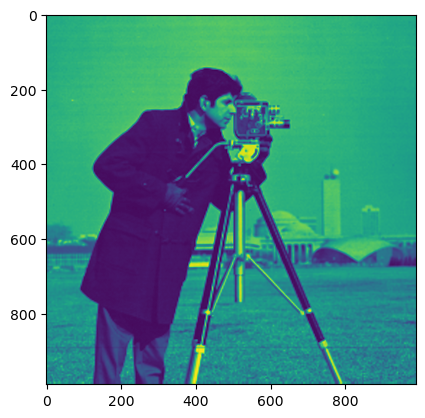

In [3]:
plt.imshow(im)

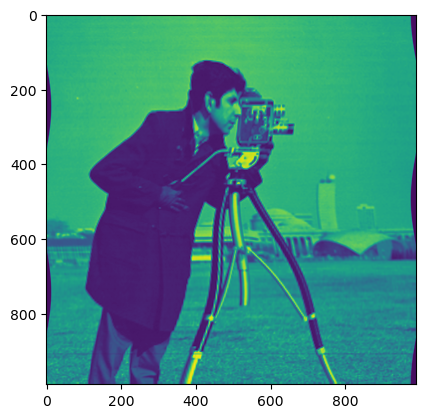

In [4]:
plt.imshow(imwip.warp(im, u, v))

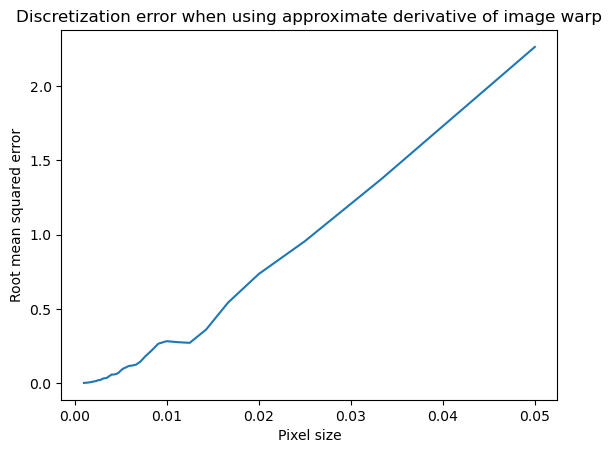

In [5]:
plt.plot([1/n for n in range(20, 1000, 10)], errors)
plt.title("Discretization error when using approximate derivative of image warp")
plt.xlabel("Pixel size")
plt.ylabel("Root mean squared error")
plt.show()

The error is proportional to the pixel size, which is to be expected as a larger pixel size implies a larger step in the image gradient.